In [4]:
#功能:
#1.二次去初自定义停用词
#2.制作词云

# 导入扩展库
import re # 正则表达式库
import collections # 词频统计库
import numpy as np # numpy数据处理库
import jieba # 结巴分词
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库
import os
import math
import random
import csv
import pandas as pd

import requests
import json
import time
from lxml import etree
import html
import re
from bs4 import BeautifulSoup

In [31]:
# input: txt文件，每行是一个微博评论的所有信息
# output: 所有句子经过分词、去除停用词之后的词语，一个list

def parse_comment_words(file):
    d = file.split('\n')
    comment = []
    # 获取所有评论，放入comment中
    for line in d:
        comment.append(line[line.find("comment_info") + 17 : line.find("comment_time") - 4])
    
    # 对所有评论进行分词
    cutted_words = ''
    for line in comment:
        line_seg = seg_sentence(line) 
        cutted_words = cutted_words + line_seg 
    cutted_words = cutted_words.split(" ")    
    
    remove_words = get_remove_words()
    result_words = []
    
    # 去除remove_words
    for word in cutted_words: # 循环读出每个分词
        if word not in remove_words: # 如果不在去除词库中
            result_words.append(word) # 分词追加到列表
    
    return(result_words)

# 创建停用词列表
def stopwordslist():
    stopwords = [line.strip() for line in open(r'C:\Users\sheng\Desktop\Coronavirus\停用词.txt',encoding='UTF-8').readlines()]
    return stopwords

# 对句子进行中文分词
def seg_sentence(sentence):
    # 对文档中的每一行进行中文分词
    sentence_depart = jieba.cut(sentence.strip())
    # 创建一个停用词列表
    stopwords = stopwordslist()
    # 输出结果为outstr
    outstr = ''
    # 去停用词
    for word in sentence_depart:
        if word not in stopwords:
            if word != '\t':
                outstr += word
                outstr += " "
    return outstr

def get_remove_words():
    remove_words = [u'中国',u'美国',u' ',u'说',u'想',u'买',u'中',u'\xa0',u'人民日报',u'转发'] # 自定义去除词库
    return(remove_words)

def get_word_freq(words):
    # 词频统计
    word_counts = collections.Counter(words) # 对分词做词频统计
    word_counts_top10 = word_counts.most_common(50) # 获取前10最高频的词
    print (word_counts_top10) # 输出检查

    # 词频展示
    mask = np.array(Image.open(r'C:\Users\sheng\Desktop\Coronavirus\background.jpg')) # 定义词频背景
    wc = wordcloud.WordCloud(
        font_path='C:/Windows/Fonts/simhei.ttf', # 设置字体格式
        mask=mask, # 设置背景图
        max_words=200, # 最多显示词数
        max_font_size=100 # 字体最大值
    )

    wc.generate_from_frequencies(word_counts) # 从字典生成词云
    image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
    wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
    plt.imshow(wc) # 显示词云
    plt.axis('off') # 关闭坐标轴
    plt.show() # 显示图像

# 去除非中文的词
# input: 包含词语的list
# output: 去掉非中文的词语的list

def delete_nonCN(words):
    words_new = []
    for w in words:
        r = ''.join(re.findall('[\u4e00-\u9fa5]', w))
        if len(r) > 0:
            words_new.append(r)
    return(words_new)

def write_list_to_file(list, path):
    fl=open(path, 'w', encoding="UTF-8")
    try:
        fl.write(' '.join(list))
        fl.close()
    except Exception:
        f1.close()

In [32]:
# 读取文件
files = os.listdir(r'C:\Users\sheng\Desktop\肺炎\crawled')

# 获取所有评论的分词结果
all_result_words = []
for f in files:
    # 读取文件
    print(f)
    filename = 'C:\\Users\\sheng\\Desktop\\肺炎\\crawled\\' + f
    f = open(filename, encoding='utf_8')
    data = f.read()
    f.close()
    
    # 对每个文件，求分词结果
    result_words = parse_comment_words(data)
    all_result_words = all_result_words + result_words

第100条微博相关评论.txt
第101条微博相关评论.txt
第102条微博相关评论.txt
第103条微博相关评论.txt
第104条微博相关评论.txt
第105条微博相关评论.txt
第106条微博相关评论.txt
第107条微博相关评论.txt
第108条微博相关评论.txt
第109条微博相关评论.txt
第110条微博相关评论.txt
第111条微博相关评论.txt
第112条微博相关评论.txt
第113条微博相关评论.txt
第114条微博相关评论.txt
第115条微博相关评论.txt
第116条微博相关评论.txt
第117条微博相关评论.txt
第118条微博相关评论.txt
第119条微博相关评论.txt
第120条微博相关评论.txt
第121条微博相关评论.txt
第122条微博相关评论.txt
第123条微博相关评论.txt
第124条微博相关评论.txt
第125条微博相关评论.txt
第126条微博相关评论.txt
第127条微博相关评论.txt
第128条微博相关评论.txt
第129条微博相关评论.txt
第130条微博相关评论.txt
第131条微博相关评论.txt
第132条微博相关评论.txt
第133条微博相关评论.txt
第134条微博相关评论.txt
第135条微博相关评论.txt
第153条微博相关评论.txt
第154条微博相关评论.txt
第155条微博相关评论.txt
第156条微博相关评论.txt
第181条微博相关评论.txt
第182条微博相关评论.txt
第183条微博相关评论.txt
第184条微博相关评论.txt
第185条微博相关评论.txt
第186条微博相关评论.txt
第187条微博相关评论.txt
第188条微博相关评论.txt
第189条微博相关评论.txt
第190条微博相关评论.txt
第191条微博相关评论.txt
第192条微博相关评论.txt
第193条微博相关评论.txt
第194条微博相关评论.txt
第195条微博相关评论.txt
第196条微博相关评论.txt
第197条微博相关评论.txt
第198条微博相关评论.txt
第199条微博相关评论.txt
第1条微博相关评论.txt
第200条微博相关评论.txt
第201条微博相关评论.txt
第202条微博相关评

[('武汉', 25941), ('口罩', 22261), ('红十字会', 21882), ('鄂', 21040), ('加油', 20193), ('物资', 18072), ('湖北', 12712), ('红十字', 10105), ('医院', 9625), ('疫情', 9609), ('领导', 8644), ('刷', 8581), ('希望', 8409), ('捐', 8360), ('国家', 7555), ('请', 7170), ('车牌', 7049), ('政府', 6998), ('红会', 6470), ('四川', 6107), ('买不到', 6094), ('上班', 5948), ('一线', 5686), ('骂', 5471), ('全国', 5264), ('病毒', 4587), ('搜', 4327), ('号', 4126), ('捐赠', 4009), ('微博', 3965), ('直播', 3902), ('山东', 3848), ('医生', 3835), ('评论', 3780), ('热', 3764), ('仓库', 3706), ('吃', 3653), ('医护人员', 3612), ('老百姓', 3529), ('太', 3500), ('确诊', 3287), ('车牌号', 3277), ('明天', 3225), ('发', 3205), ('钱', 3201), ('死', 3170), ('复工', 3165), ('东西', 3027), ('真', 2981), ('月', 2972)]


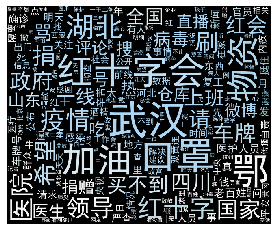

In [33]:
final_words = delete_nonCN(all_result_words)
get_word_freq(final_words)
write_list_to_file(all_result_words, "all_result_words.txt")

In [2]:
# 每条微博按照评论数量的比例，抽取20000条样本的所有信息，放入sample.csv中

# 计算每个txt文件有多少条评论，提取文件名
# 读取文件
files = os.listdir(r'C:\Users\sheng\Desktop\肺炎\crawled')

# 获取所有评论的分词结果
all_result_words = []
num_comment = np.array([])
file_num = np.array([])
comment_selected = []
total = 288565 # 总共有288565条评论

for f in files:
    # 读取文件
    #print(f)
    file_num = np.append(file_num, re.findall(r'[0-9]+',f))
    filename = 'C:\\Users\\sheng\\Desktop\\肺炎\\crawled\\' + f
    f = open(filename, encoding='utf_8')
    data = f.read()
    f.close()
    
    lines = data.split("\n")
    num_comment = np.append(num_comment, len(lines))

    idx = np.random.randint(0, len(lines)-1, int(np.ceil(20000/total*len(lines))))
    
    comment_selected = comment_selected + [lines[i] for i in tuple(idx)]
    
def write_to_csv(lst, file_path):
    lst = comment_selected
    f = open(file_path,'w',encoding='utf-8-sig', newline="")

    # 2. 基于文件对象构建 csv写入对象
    csv_writer = csv.writer(f)
    # 3. 构建列表头
    csv_writer.writerow(["name","comment","comment_time","url"])

    for line in lst:
        # 4. 写入csv文件内容
        name = line[line.find("name") + 8 : line.find("comment_info") - 4]
        comment = line[line.find("comment_info") + 17 : line.find("comment_time") - 4]
        comment_time = line[line.find("comment_time") + 16 : line.find("comment_url") - 4]
        url = line[line.find("comment_url") + 15 : len(line) - 2]
        if comment != "":
            csv_writer.writerow([name, comment, comment_time, url])
    
    # 5. 关闭文件
    f.close()   
    
write_to_csv(comment_selected, "样本.csv")

In [3]:
len(comment_selected)

20080

In [4]:
# 获取sample中发表评论的用户的所在地，结果已存入location.txt中


headers = {
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "zh-CN,zh;q=0.9,en;q=0.8",
    "cache-control": "max-age=0",
    "cookie": 'T_WM=21171183975; MLOGIN=1; ALF=1579949456; SUB=_2A25zAODBDeRhGeNH71cW8C7JzT-IHXVQCoCJrDV6PUNbktAfLWfikW1NSrmBrV4ehny4mIUfIMt6PUnGhLG2OKQm; SUBP=0033WrSXqPxfM725Ws9jqgMF55529P9D9Wh9Sw7lc_GXZ_pWFIOQfoTv5JpX5KzhUgL.Fo-4Sh-Neh5fSoe2dJLoIp7LxKML1KBLBKnLxKqL1hnLBoMf1KBfS057SKq0; SUHB=02MvMnvA2QYvsK; SSOLoginState=1577357457; WEIBOCN_FROM=1110006030; M_WEIBOCN_PARAMS=oid%3D4453821038317663%26lfid%3D4225108094801233%26luicode%3D20000174%26uicode%3D20000061%26fid%3D4453821038317663',
    "referer": "https://s.weibo.com/weibo/%E4%BA%BA%E6%B0%91%E6%97%A5%E6%8A%A5?topnav=1&wvr=6&topsug=1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.96 Safari/537.36",
    }
        
proxy = {
    'HTTP': 'HTTP://180.125.70.78:9999',
    'HTTP': 'HTTP://117.90.4.230:9999',
    'HTTP': 'HTTP://111.77.196.229:9999',
    'HTTP': 'HTTP://111.177.183.57:9999',
    'HTTP': 'HTTP://123.55.98.146:9999',
}

data = pd.read_csv('C:\\Users\\sheng\\Desktop\\Coronavirus\\score\\sample.csv')  # 读取训练数据
print(data.shape)

for i in range(7627, 19527): # 7627
    a = data['url'][i]
    user_id =  a[a.find("com") + 4:]
    url = 'https://weibo.com/u/' + user_id + '?is_hot=1'
    try:
        res = requests.get(url, headers=headers)
        content = res.content.decode().replace("\\t", "")
        loc = re.compile(r'span class=\\"item_text W_fl\\">\\r\\n\s+[\u4e00-\u9fa5\s]+', re.S).findall(content)[0]
        location = loc.strip()[-15:].strip()
        print(data['no'][i], " ", location)
        data['score'][i] = location
    except Exception as E:
        print(data['no'][i])
        data['score'][i] = ""
    time.sleep(np.random.rand(1)* 2 + 1)
    

(19527, 6)


In [5]:
import pandas as pd

data = pd.read_csv('C:\\Users\\sheng\\Desktop\\Coronavirus\\score\\sample.csv')  # 读取训练数据
print(data.shape)

(19527, 6)


In [6]:
np.mean(data['score'])

-0.3555589696317919

In [7]:
data['comment']

0        求求那些刷车牌的，能不能先去国务院下面的“疫情监督”平台先去举报一波？那里比这里复制粘贴更管...
1                                      任命日报就可以不标明出处？？？？？？？
2                                                    回形针牛逼
3                                          二流报纸竟然发盗版视频啦！！！
4        我在武汉看到一只鄂鱼，它一声尖叫，它是02号60米长，它可恶的W状，出入什么会如无人之境，一...
5                                                  和死比体力呗！
6                                                       出处
7                                                       鄂A
8                                                  🐊A什么来着？
9                                                    授权了嘛？
10                                                     过来看
11                                           你敢报吗，可是有质疑数据呢
12                                                  要标明作者呀
13                                                      真棒
14                       男朋友❤️今天不在家❤️，马书记带我上了鄂A0⃣️二6⃣️0⃣️w
15                                                   你们看看！
16                                               每天都希望变得